In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [63]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [5]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    "tomatoimg",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [6]:
class_names = datasets.class_names

In [50]:
print(len(class_names))
len_class = len(class_names)
class_names

10


['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [8]:
len(datasets)

501

In [9]:
501*32

16032

In [12]:
for image_batch, label_batch in datasets.take(1):
    print(image_batch.shape)
    print(image_batch[0].numpy())
    print(label_batch.numpy())

(32, 256, 256, 3)
[[[160. 149. 153.]
  [144. 133. 137.]
  [150. 139. 143.]
  ...
  [163. 151. 151.]
  [106.  94.  94.]
  [112. 100. 100.]]

 [[179. 168. 172.]
  [157. 146. 150.]
  [155. 144. 148.]
  ...
  [126. 114. 114.]
  [161. 149. 149.]
  [149. 137. 137.]]

 [[162. 151. 155.]
  [167. 156. 160.]
  [185. 174. 178.]
  ...
  [120. 108. 108.]
  [161. 149. 149.]
  [144. 132. 132.]]

 ...

 [[151. 140. 144.]
  [138. 127. 131.]
  [151. 140. 144.]
  ...
  [176. 164. 168.]
  [138. 126. 130.]
  [151. 139. 143.]]

 [[158. 147. 151.]
  [145. 134. 138.]
  [160. 149. 153.]
  ...
  [142. 130. 134.]
  [135. 123. 127.]
  [142. 130. 134.]]

 [[157. 146. 150.]
  [147. 136. 140.]
  [159. 148. 152.]
  ...
  [119. 107. 111.]
  [152. 140. 144.]
  [160. 148. 152.]]]
[6 4 6 6 9 5 5 1 3 5 7 9 6 7 5 7 2 6 3 1 6 1 7 7 5 9 6 6 0 0 4 2]


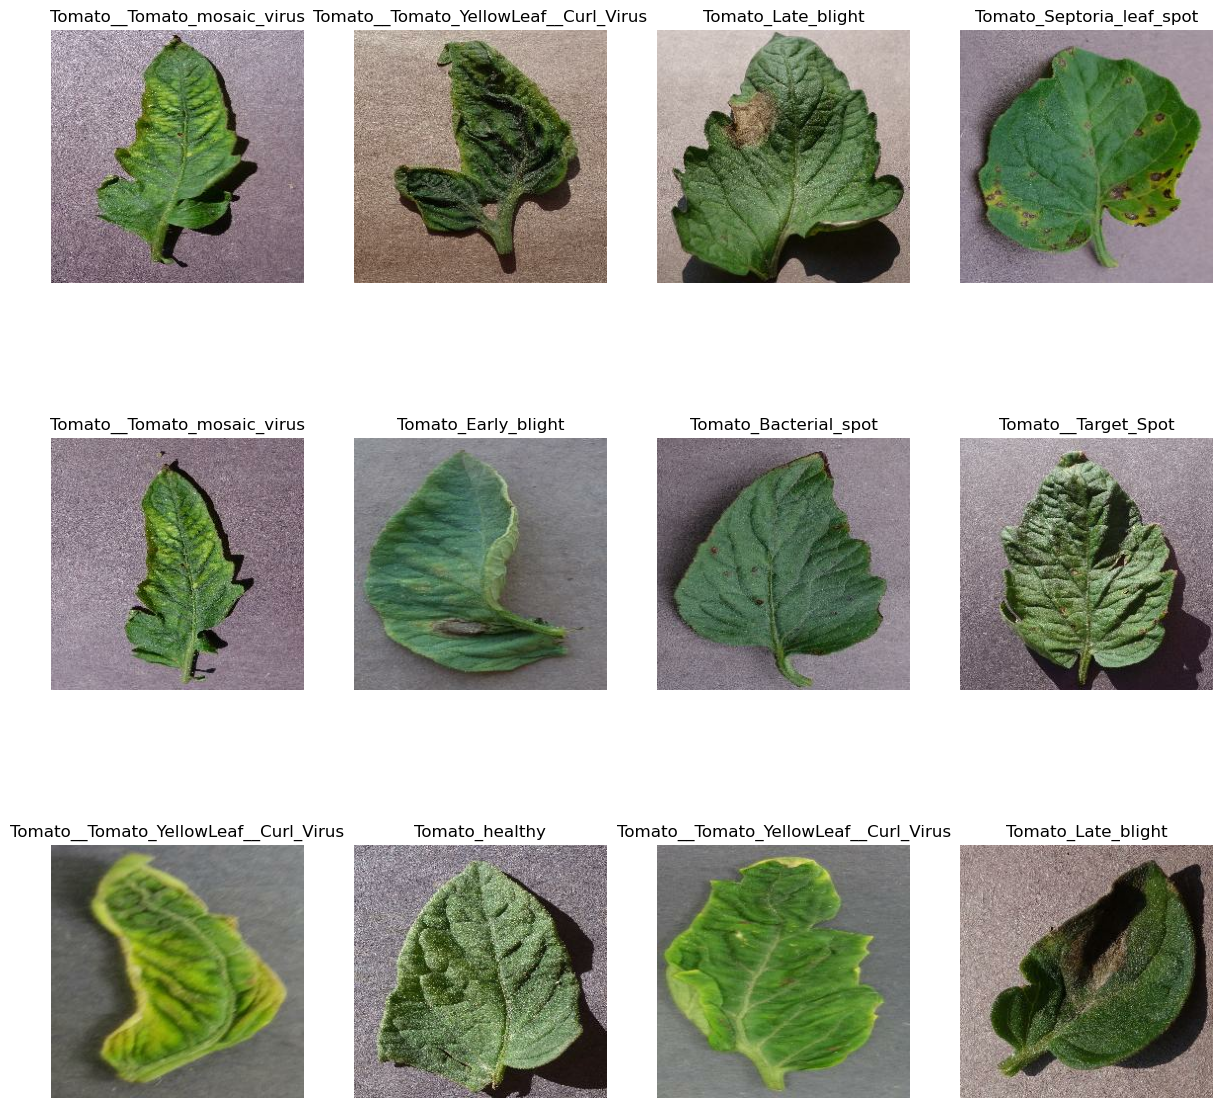

In [28]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in datasets.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
    

In [29]:
#Here we'll be diving the 80% data to training data
# 20% data in which 10% for each validation and test

In [34]:
# LETS build a splitting methood which divides a data into train test and validation

In [42]:
def split_Data(dataset,train_size=0.8,test_size=0.1,val_size=0.1,shuffle = True,shuffle_size = 10000):
    ds_len = len(dataset)
    if shuffle:
        ds = datasets.shuffle(shuffle_size,seed=12)
    train_len = int(ds_len*train_size)
    test_len = int(ds_len*test_size)
    val_len = int(ds_len*val_size)
    
    train_ds = dataset.take(train_len)
    val_ds = dataset.skip(train_len).take(val_len)
    test_ds = dataset.skip(train_len).skip(val_len)
    return train_ds,test_ds,val_ds

In [43]:
train_ds,test_ds,val_ds = split_Data(datasets)

In [44]:
len(train_ds)

400

In [45]:
len(test_ds)

51

In [46]:
len(val_ds)

50

In [47]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [48]:
resize_and_rescaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [49]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.3)
])

In [64]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = models.Sequential([
    resize_and_rescaling,
    data_agumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len_class,activation='softmax'),
                
])
                        
model.build(input_shape = input_shape)

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, None)    0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, None)    0         
                                                                 
 conv2d_16 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [66]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCatego   ricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [67]:
model.fit(train_ds,epochs = EPOCHS,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/50
400/400 [==============================] - 392s 956ms/step - loss: 1.7009 - accuracy: 0.3898 - val_loss: 1.3583 - val_accuracy: 0.4969
Epoch 2/50
400/400 [==============================] - 622s 2s/step - loss: 1.0599 - accuracy: 0.6180 - val_loss: 1.1217 - val_accuracy: 0.6306
Epoch 3/50
400/400 [==============================] - 408s 1s/step - loss: 0.7024 - accuracy: 0.7502 - val_loss: 1.0924 - val_accuracy: 0.6650
Epoch 4/50
400/400 [==============================] - 381s 952ms/step - loss: 0.5602 - accuracy: 0.8021 - val_loss: 1.4700 - val_accuracy: 0.6187
Epoch 5/50
400/400 [==============================] - 382s 955ms/step - loss: 0.4674 - accuracy: 0.8370 - val_loss: 0.6631 - val_accuracy: 0.7794
Epoch 6/50
400/400 [==============================] - 389s 972ms/step - loss: 0.4008 - accuracy: 0.8601 - val_loss: 0.4596 - val_accuracy: 0.8331
Epoch 7/50
400/400 [==============================] - 374s 935ms/step - loss: 0.3485 - accuracy: 0.8779 - val_loss: 0.6373 - val_a

In [68]:
scores= model.evaluate(test_ds)

51/51 [==============================] - 16s 201ms/step - loss: 0.1524 - accuracy: 0.9466


In [69]:
scores

[0.1523902267217636, 0.9466170072555542]

The image is 

Actual label is Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 [==============================] - 0s 216ms/step
The Predicted Label is Tomato__Tomato_YellowLeaf__Curl_Virus


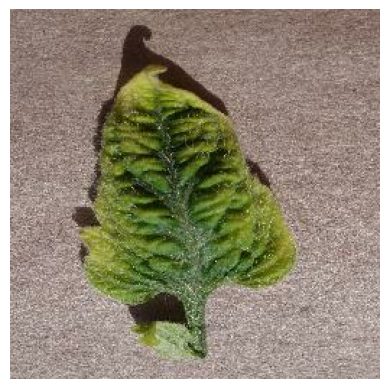

In [84]:
import numpy as np
for img,label in test_ds.take(1):
    img1 = img[0].numpy().astype('uint8')
    lab1 = label[0].numpy()
    print("The image is \n")
    print(f"Actual label is {class_names[lab1]}")
    plt.imshow(img1)
    batch_prediction = model.predict(img)
    print(f"The Predicted Label is {class_names[np.argmax(batch_prediction[0])]}")
    plt.axis("off")

In [93]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)#create a batch
    
    prediction = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 35ms/step


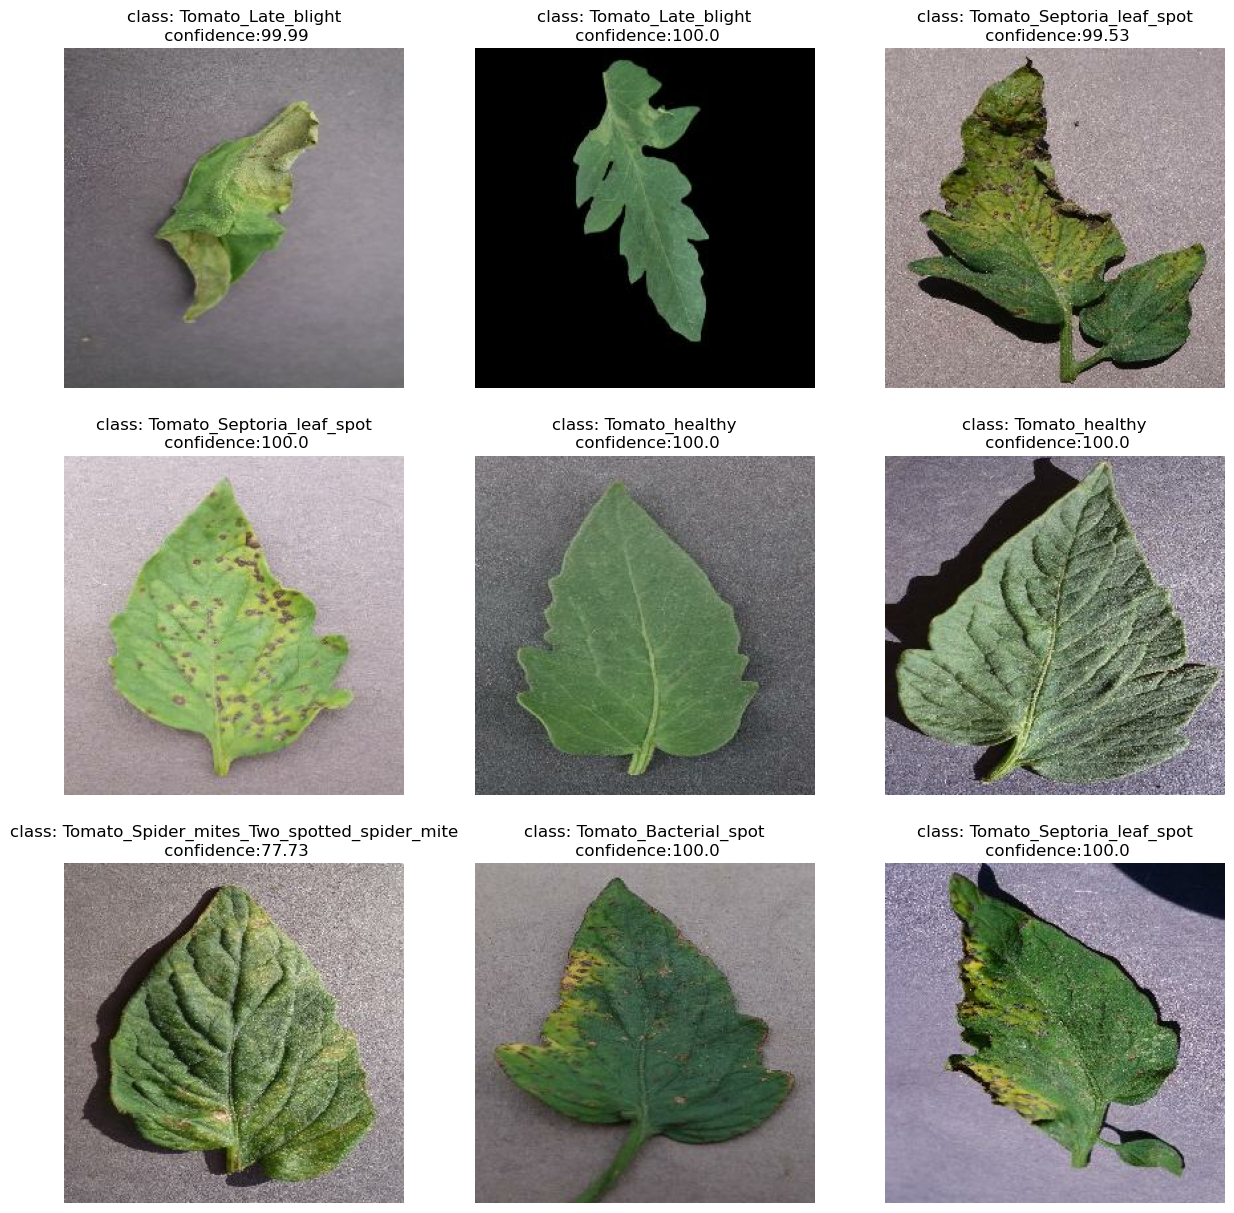

In [95]:
plt.figure(figsize=(15,15))
for img,label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.axis("off")
        predicted_class,confidence = predict(model,img[i].numpy())
        plt.title(f"class: {predicted_class}\n confidence:{confidence}")  
        

In [98]:
import os
model_version = max([int(i) for i in os.listdir("./allmodels")+[0]])+1
model.save(f"./allmodels/{model_version}")

INFO:tensorflow:Assets written to: ./allmodels/1\assets


INFO:tensorflow:Assets written to: ./allmodels/1\assets
